<a href="https://colab.research.google.com/github/nafirdausy/Capstone-Project/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
!pip install -q wordcloud matplotlib pandas

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import os
from langchain_community.llms import Replicate
from google.colab import userdata

api_token = userdata.get("user")

os.environ["REPLICATE_API_TOKEN"] = user

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs={"temperature": 0.7, "max_new_tokens": 4096}
)

In [ ]:
!pip install -q Kaggle

In [ ]:
from google.colab import files
upload=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mkarmand/locknlock-reviews-on-tokopedia

Dataset URL: https://www.kaggle.com/datasets/mkarmand/locknlock-reviews-on-tokopedia
License(s): apache-2.0
  0% 0.00/396k [00:00<?, ?B/s]
100% 396k/396k [00:00<00:00, 577MB/s]


In [ ]:
!unzip locknlock-reviews-on-tokopedia.zip

Archive:  locknlock-reviews-on-tokopedia.zip
  inflating: TokopediaLocknLock.csv  
  inflating: TokopediaLocknLock3k.csv  


In [52]:
df = pd.read_csv("TokopediaLocknLock.csv")

In [53]:
print(df.columns)

Index(['Ulasan'], dtype='object')


In [54]:
df = df[['Ulasan']].dropna().head(100)

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

df['cleaned_review'] = df['Ulasan'].apply(clean_text)


In [56]:
#SENTIMEN
def classify_sentiment(Ulasan):
    prompt = f"Classify the following product review into Positive, Negative, or Neutral:\n\n{Ulasan}"
    response = llm.invoke(prompt)
    return response.strip()

print("Classifying public sentiment...")
df['sentiment'] = df['cleaned_review'].apply(classify_sentiment)

Classifying public sentiment...


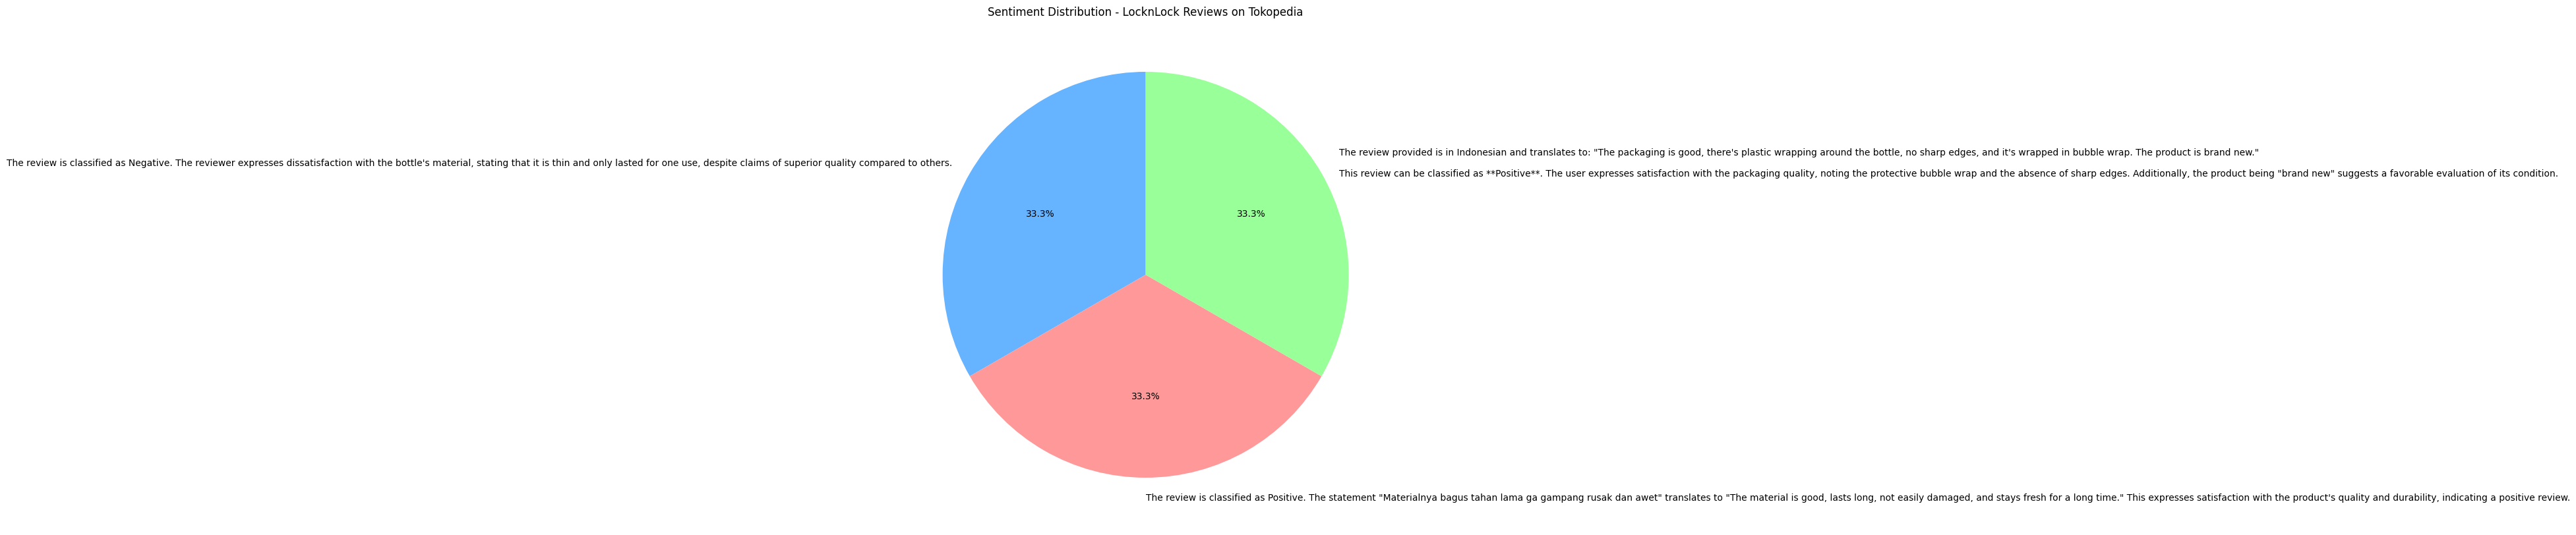

In [ ]:
#VISUALIZATION
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(10,10))
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title("Sentiment Distribution - LocknLock Reviews on Tokopedia")
plt.ylabel('')
plt.show()

In [ ]:
#SUMMARIZATION
combined_text = "\n".join(df['cleaned_review'].tolist())[:3000]  # Truncate to stay within token limit

summary_prompt = f"Summarize the following public reviews of LocknLock products into key insights and main themes:\n\n{combined_text}"
summary = llm.invoke(summary_prompt)

print("\n--- AI Summary ---")
print(summary)


--- AI Summary ---
Key Insights and Main Themes from Public Reviews of LocknLock Products:

1. **Durability and Longevity**: Reviewers frequently highlight the high-quality, durable material of LocknLock bottles, noting their resistance to damage and long-lasting nature. The bottles are praised for their ability to withstand wear and tear over extended periods.

2. **Unique Design (Pet 1)**: There is specific mention of the distinctiveness of LocknLock's Pet 1 bottle, suggesting it offers a unique design or feature compared to other bottles, though the exact nature of this difference isn't explicitly stated in the reviews.

3. **Safe Packaging**: Customers appreciate the secure packaging of LocknLock products, which includes plastic casing and bubble wrap. This ensures that the bottles arrive without any damage or sharp edges, indicating a focus on product protection during shipping.

4. **New Stock**: Some reviews emphasize that the products are new and not refurbished, reinforcing t